In [1]:
# Import our dependencies
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# import our input datasets
test_df = pd.read_csv('data/2122season.csv')
train_df = pd.read_csv('data/past_seasons.csv')

In [3]:
train_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,72,0.069,0.079,0.035,0.019,0.112,-0.006,0.039,0.065,0.062,...,0.150,0.129,0.134,0.082,-0.038,0.003,-0.122,-0.101,0.093,0.569
1,67,-0.180,-0.197,-0.194,-0.002,-0.246,-0.204,-0.018,-0.175,-0.187,...,-0.308,-0.208,-0.233,-0.242,-0.225,-0.186,-0.223,-0.199,-0.194,0.299
2,82,0.008,0.084,0.073,0.005,0.164,0.193,-0.009,0.051,0.004,...,0.285,0.049,0.100,0.088,0.058,0.204,0.095,0.203,0.097,0.354
3,82,-0.009,0.002,0.014,-0.005,0.258,0.190,0.019,-0.076,-0.065,...,-0.118,-0.036,-0.055,0.004,-0.051,-0.123,-0.014,0.077,0.002,0.293
4,82,0.003,-0.014,-0.001,-0.006,-0.106,-0.081,-0.009,0.017,0.040,...,0.240,0.008,0.053,-0.077,-0.100,-0.183,0.055,-0.050,0.003,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,82,-0.003,0.057,0.069,-0.005,0.535,0.411,0.022,0.046,0.054,...,-0.015,0.003,-0.002,-0.047,0.275,NaN,NaN,NaN,NaN,NaN
1136,82,0.005,0.011,-0.022,0.016,0.014,0.190,-0.044,0.011,-0.029,...,-0.066,-0.018,-0.033,0.071,-0.241,NaN,NaN,NaN,NaN,NaN
1137,82,-0.001,-0.028,-0.015,-0.006,0.186,0.004,0.045,-0.031,-0.016,...,0.050,-0.059,-0.028,0.032,0.140,NaN,NaN,NaN,NaN,NaN
1138,82,0.003,-0.042,-0.046,0.002,-0.092,-0.021,-0.020,-0.041,-0.047,...,-0.094,0.020,-0.016,-0.078,0.003,NaN,NaN,NaN,NaN,NaN


In [4]:
test_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,60,-0.173,-0.159,-0.160,0.001,-0.156,-0.165,0.004,-0.160,-0.158,...,-0.217,-0.181,-0.189,-0.159,-0.181,-0.222,-0.225,-0.203,-0.176,0.483
1,63,-0.119,-0.160,-0.139,-0.012,-0.190,-0.119,-0.030,-0.146,-0.153,...,-0.122,-0.071,-0.083,-0.112,-0.185,-0.008,-0.131,-0.203,-0.152,0.571
2,63,-0.117,-0.074,-0.080,0.003,-0.124,-0.094,-0.012,-0.049,-0.071,...,-0.084,-0.100,-0.096,-0.115,-0.035,-0.110,-0.210,-0.025,-0.088,0.476
3,62,-0.142,-0.142,-0.154,0.006,-0.241,-0.249,0.004,-0.100,-0.094,...,-0.216,-0.160,-0.172,-0.222,-0.085,-0.082,-0.262,-0.149,-0.126,0.629
4,61,-0.160,-0.135,-0.165,0.016,-0.007,-0.054,0.017,-0.180,-0.223,...,-0.161,-0.097,-0.112,-0.105,-0.220,-0.188,-0.184,-0.212,-0.130,0.590
5,61,-0.150,-0.193,-0.167,-0.015,-0.217,-0.179,-0.017,-0.181,-0.159,...,-0.128,-0.157,-0.151,-0.128,-0.049,-0.193,-0.114,-0.133,-0.196,0.590
6,61,-0.160,-0.196,-0.178,-0.010,-0.143,-0.093,-0.021,-0.218,-0.232,...,-0.277,-0.124,-0.160,-0.142,-0.244,-0.310,-0.095,-0.138,-0.186,0.590
7,61,-0.156,-0.178,-0.120,-0.030,-0.190,-0.111,-0.031,-0.173,-0.126,...,-0.024,-0.181,-0.145,-0.205,-0.113,-0.210,-0.176,-0.104,-0.181,0.246
8,61,-0.151,-0.172,-0.169,-0.002,-0.158,-0.123,-0.015,-0.180,-0.205,...,0.037,-0.130,-0.099,-0.162,-0.024,-0.143,-0.148,-0.183,-0.174,0.705
9,60,-0.166,-0.178,-0.190,0.006,-0.194,-0.204,0.004,-0.170,-0.178,...,-0.130,-0.186,-0.174,-0.186,-0.200,-0.247,-0.052,-0.133,-0.170,0.250


In [5]:
train_df = train_df.dropna()
train_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%
0,72,0.069,0.079,0.035,0.019,0.112,-0.006,0.039,0.065,0.062,...,0.150,0.129,0.134,0.082,-0.038,0.003,-0.122,-0.101,0.093,0.569
1,67,-0.180,-0.197,-0.194,-0.002,-0.246,-0.204,-0.018,-0.175,-0.187,...,-0.308,-0.208,-0.233,-0.242,-0.225,-0.186,-0.223,-0.199,-0.194,0.299
2,82,0.008,0.084,0.073,0.005,0.164,0.193,-0.009,0.051,0.004,...,0.285,0.049,0.100,0.088,0.058,0.204,0.095,0.203,0.097,0.354
3,82,-0.009,0.002,0.014,-0.005,0.258,0.190,0.019,-0.076,-0.065,...,-0.118,-0.036,-0.055,0.004,-0.051,-0.123,-0.014,0.077,0.002,0.293
4,82,0.003,-0.014,-0.001,-0.006,-0.106,-0.081,-0.009,0.017,0.040,...,0.240,0.008,0.053,-0.077,-0.100,-0.183,0.055,-0.050,0.003,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,82,0.001,0.000,-0.036,0.018,0.469,0.222,0.051,-0.009,-0.045,...,-0.017,0.024,0.011,0.002,0.125,-0.155,0.163,-0.055,0.011,0.585
1029,82,-0.003,0.036,0.046,-0.005,3.267,1.965,0.077,0.022,0.024,...,-0.039,-0.017,-0.025,0.102,-0.124,-0.137,-0.157,0.049,0.007,0.500
1030,82,0.003,-0.074,-0.060,-0.008,-0.712,-0.587,-0.076,-0.065,-0.045,...,0.131,0.027,0.059,-0.120,-0.112,0.931,-0.035,0.005,-0.059,0.585
1031,84,0.001,0.029,0.005,0.012,-0.366,-0.172,-0.061,0.033,0.008,...,-0.106,0.045,-0.007,0.148,0.092,0.563,0.109,-0.005,0.019,0.536


In [6]:
#split up target column
X_train = train_df.drop('PTS',axis=1)
y_train = train_df['PTS']
X_test = test_df.drop('PTS',axis=1)
y_test = test_df['PTS']

In [7]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train the Linear Regression model on the scaled data and print the model score
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
print(f"R-squared Training Score: {LR.score(X_train_scaled, y_train)}")
print(f"R-squared Testing Score: {LR.score(X_test_scaled, y_test)}")

R-squared Training Score: 0.999729505241573
R-squared Testing Score: 0.9810870278808195


In [10]:
# Test accuracy of prediction model
y_prediction = LR.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print("MSE:", mse)
print("RMSE:", mse*(1/2.0)) 

MSE: 0.016676798387719866
RMSE: 0.008338399193859933


In [11]:
#build dataframe for results
teams = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','BKN/NJN','NOP','NYK','OKC','ORL','PHI','PHX','POR','SAC','SAS','TOR','UTA','WAS']
predicted_df = pd.DataFrame(
    {'Team': teams})

In [12]:
#loop through for predicted values
PTS = []
for i in range(0, len(predicted_df['Team'])):
    Score = y_prediction[i].round(decimals=3)
    PTS.append(Score)

In [13]:
#fill in dataframe
predicted_df['predictedPTS'] = PTS
predicted_df['actualPTS'] = test_df['PTS']
predicted_df

,Team,predictedPTS,actualPTS
0,ATL,-0.043,-0.176
1,BOS,-0.038,-0.152
2,CHA,-0.030,-0.088
3,CHI,-0.033,-0.126
4,CLE,-0.036,-0.130
5,DAL,-0.045,-0.196
6,DEN,-0.043,-0.186
7,DET,-0.042,-0.181
8,GSW,-0.042,-0.174
9,HOU,-0.041,-0.170


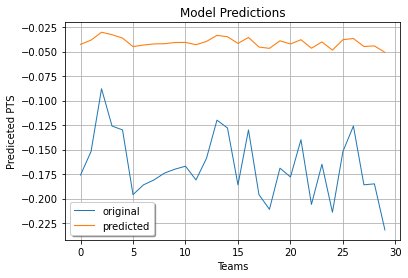

<Figure size 432x288 with 0 Axes>

In [14]:
#build graph
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.title("Model Predictions")
plt.xlabel('Teams')
plt.ylabel('Prediceted PTS')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
plt.savefig('combined_graph')

In [15]:
#drop index
predicted_df = predicted_df.set_index("Team")
predicted_df

,predictedPTS,actualPTS
Team,,
ATL,-0.043,-0.176
BOS,-0.038,-0.152
CHA,-0.030,-0.088
CHI,-0.033,-0.126
CLE,-0.036,-0.130
DAL,-0.045,-0.196
DEN,-0.043,-0.186
DET,-0.042,-0.181
GSW,-0.042,-0.174


In [16]:
#put data in more proper format
predicted_df["predictedPTS"] = predicted_df["predictedPTS"].map("{:.3f}%".format)
predicted_df["actualPTS"] = predicted_df["actualPTS"].map("{:.3f}%".format)
predicted_df

,predictedPTS,actualPTS
Team,,
ATL,-0.043%,-0.176%
BOS,-0.038%,-0.152%
CHA,-0.030%,-0.088%
CHI,-0.033%,-0.126%
CLE,-0.036%,-0.130%
DAL,-0.045%,-0.196%
DEN,-0.043%,-0.186%
DET,-0.042%,-0.181%
GSW,-0.042%,-0.174%


In [17]:
#convert to html
ptstable = predicted_df.to_html()
ptscombinedtable = ptstable.replace('\n','')
ptscombinedtable

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>predictedPTS</th>      <th>actualPTS</th>    </tr>    <tr>      <th>Team</th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>ATL</th>      <td>-0.043%</td>      <td>-0.176%</td>    </tr>    <tr>      <th>BOS</th>      <td>-0.038%</td>      <td>-0.152%</td>    </tr>    <tr>      <th>CHA</th>      <td>-0.030%</td>      <td>-0.088%</td>    </tr>    <tr>      <th>CHI</th>      <td>-0.033%</td>      <td>-0.126%</td>    </tr>    <tr>      <th>CLE</th>      <td>-0.036%</td>      <td>-0.130%</td>    </tr>    <tr>      <th>DAL</th>      <td>-0.045%</td>      <td>-0.196%</td>    </tr>    <tr>      <th>DEN</th>      <td>-0.043%</td>      <td>-0.186%</td>    </tr>    <tr>      <th>DET</th>      <td>-0.042%</td>      <td>-0.181%</td>    </tr>    <tr>      <th>GSW</th>      <td>-0.042%</td>      <td>-0.174%</td>    </tr>    <tr>      <th>HOU</th>      <td>-0.041%</td>